# STA130 Week 05 Homework

**Name:** Varak Tanashian

**Date:** October 3rd, 2024

**Assignment:** Week 04 Homework

---

## Course Information
- **Course:** STA130 - An Introduction to Statistical Reasoning and Data Science
- **Instructor:** Prof. Scott Schwartz 
- **Term:** Fall 2024

---

*This notebook contains my solutions and work for the Week 02 Homework assignment. The required Chatbot logs are included as well*

##### ChatGPT Summary: Found at the bottom of this notebook  
##### Chat Link
- https://chatgpt.com/share/66ff3dca-88b4-800a-a2ee-a02772bc01a0

### Question 1

1. Standard Error of the Mean as the Standard Deviation of Bootstrapped Means: The standard error of the mean shows how much we can expect sample means to vary when we take multiple samples from a population. Using bootstrapping, we create lots of simulated samples from our original data by resampling with replacement. The means of these samples make up the bootstrap distribution, and the standard deviation of this distribution gives us the standard error. This method doesn’t assume a specific data distribution, making it flexible and useful. As we increase the number of samples, the SE gets smaller, meaning our estimate of the population mean becomes more reliable. SE is crucial for creating confidence intervals that help us understand where the true population mean likely lies.

2. Difference Between Standard Error of the Mean and Standard Deviation of Original Data: Standard deviation measures how spread out individual data points are in a dataset, showing the natural variability in the data. In contrast, the standard error of the mean (Standard Error) looks at how much sample means can vary across different samples from the same population. The standard error is usually smaller than standard deviation because it deals with means, which are less variable than individual data points. Additionally, the standard error decreases as the sample size increases, making our estimate of the population mean more precise. While standard deviation is used for describing data, standard error is important for making inferences, like creating confidence intervals and testing hypotheses. 

Essentially, standard deviation tells us about the data's spread, while standard error tells us about the reliability of the sample mean.



### Question 2
1. Calculate the standard error (SE), also knkown as the standard deviation of bootstrapped means
2. Determine the confidence interval by using the formula:
$$CI = Sample Mean ± 1.96 * SE$$

(Assuming that the distribution of sample means is approximately normal)

### Question 3

To create a 95% confidence interval that covers 95% of the bootstrapped sample means using the standard error of the mean (SE), follow these steps:

1) Generate Bootstrap Samples: Resample your original dataset with replacement to create a large number of bootstrap samples (typically 1,000 or more). Calculate the mean for each sample.

2) Calculate the Bootstrap Distribution: From the means of these bootstrap samples, construct the bootstrap distribution. This distribution shows how the means vary.

3) Find the Standard Error: Compute the standard deviation of the bootstrap means. This value is your standard error of the mean (SE).

4) Determine the Confidence Interval: For a 95% confidence interval, you want to find the values that encompass the middle 95% of the bootstrap means. You can do this by:

* Sorting the bootstrap means from smallest to largest.
* Identifying the 2.5th percentile (the value below which 2.5% of the means fall) and the 97.5th percentile (the value below which 97.5% of the means fall).

5) Construct the Interval: The 95% confidence interval is then given by the range between these two percentiles.

This interval reflects where you would expect the true population mean to lie, based on the variability of the bootstrapped sample means. It captures the uncertainty in your estimate and shows that if you were to take many samples and repeat this process, about 95% of the calculated intervals would cover the true population mean.

To create a 95% bootstrapped confidence interval, resample the data many times (1000 times or more, for example), calculate the mean for each sample, sort the means, and use the 2.5th and 97.5th percentiles as the confidence interval bounds.

### Question 4


In [7]:
import pandas as pd
import numpy as np

# Load the dataset containing customer information
df = pd.read_csv('Churn_Modelling.csv')

# Calculate the overall churn rate as the mean of the 'Exited' column (1 for churn, 0 for stay)
churn_rate = df['Exited'].mean() * 100

# Group data by 'Geography' to calculate the average churn rate for each geographic location
churn_by_geo = df.groupby('Geography')['Exited'].mean() * 100

# Group data by 'Gender' to calculate the average churn rate for each gender
churn_by_gender = df.groupby('Gender')['Exited'].mean() * 100

# Calculate average credit score for customers who churned and those who stayed
avg_credit_churn = df.groupby('Exited')['CreditScore'].mean()

# Calculate average tenure for customers who churned and those who stayed
avg_tenure_churn = df.groupby('Exited')['Tenure'].mean()

# Group by number of products to calculate churn rate for customers with different numbers of products
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Print the overall churn rate
print(f"Overall Churn Rate: {churn_rate:.2f}%\n")

# Print churn rate by geography
print("Churn Rate by Geography:")
for geo, rate in churn_by_geo.items():
    print(f"{geo}: {rate:.2f}%")

# Print churn rate by gender
print("\nChurn Rate by Gender:")
for gender, rate in churn_by_gender.items():
    print(f"{gender}: {rate:.2f}%")

# Print average credit scores for churned and stayed customers
print("\nAverage Credit Score - Customers Who Churn vs. Stay:")
print(f"Stay: {avg_credit_churn[0]:.2f}, Churn: {avg_credit_churn[1]:.2f}")

# Print average tenures for churned and stayed customers
print("\nAverage Tenure - Customers Who Churn vs. Stay:")
print(f"Stay: {avg_tenure_churn[0]:.2f}, Churn: {avg_tenure_churn[1]:.2f}")

# Print churn rate by number of products
print("\nChurn Rate by Number of Products:")
for num_products, rate in churn_by_products.items():
    print(f"{int(num_products)} product(s): {rate:.2f}%")

# Analyze churn rates based on the number of products
if churn_by_products[1] > churn_by_products[2]:
    print("\nCustomers with fewer products are more likely to churn. Consider promoting additional products to reduce churn.")

# Analyze the relationship between credit score and churn
if avg_credit_churn[1] < avg_credit_churn[0]:
    print("\nCustomers with lower credit scores tend to churn more. Focus on improving financial health and support.")

# Identify the geography with the highest churn rate
if churn_by_geo.max() > churn_rate:
    max_geo = churn_by_geo.idxmax()
    print(f"\nChurn rate is highest in {max_geo}. Consider investigating market-specific factors or issues.")

# Compare churn rates between genders
if churn_by_gender['Female'] > churn_by_gender['Male']:
    print("\nFemale customers have a higher churn rate. Consider tailoring retention strategies for them.")

# -------------------------------------------------------------------------
# To calculate a 95% bootstrap confidence interval for the median instead of the mean,
# we would implement the following logic for the credit score of customers who churned/stayed.

# Example: Calculate bootstrap confidence intervals for CreditScore
def bootstrap_confidence_interval(data, num_iterations=1000, confidence_level=0.95):
    """ 
    Generate bootstrap samples and calculate the confidence interval for the median.
    
    Parameters:
    - data: The dataset to sample from.
    - num_iterations: The number of bootstrap samples to generate.
    - confidence_level: The desired confidence level (e.g., 0.95 for 95%).
    
    Returns:
    - A tuple containing the lower and upper bounds of the confidence interval.
    """
    bootstrapped_medians = []  # List to store the median from each bootstrap sample

    for _ in range(num_iterations):
        # Generate a bootstrap sample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the median of the bootstrap sample
        bootstrapped_medians.append(np.median(sample))

    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrapped_medians, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_medians, (confidence_level + (1 - confidence_level) / 2) * 100)
    return lower_bound, upper_bound

# Calculate confidence intervals for CreditScore for customers who stayed (Exited == 0)
credit_score_stay = df[df['Exited'] == 0]['CreditScore']
credit_score_ci_stay = bootstrap_confidence_interval(credit_score_stay)

# Calculate confidence intervals for CreditScore for customers who churned (Exited == 1)
credit_score_churn = df[df['Exited'] == 1]['CreditScore']
credit_score_ci_churn = bootstrap_confidence_interval(credit_score_churn)

# Print the bootstrap confidence intervals for CreditScore
print("\n95% Bootstrap Confidence Intervals for Credit Score:")
print(f"Credit Score CI for Stay: [{credit_score_ci_stay[0]:.2f}, {credit_score_ci_stay[1]:.2f}]")
print(f"Credit Score CI for Churn: [{credit_score_ci_churn[0]:.2f}, {credit_score_ci_churn[1]:.2f}]")

# Similarly, you can repeat the bootstrap method for other parameters like 'Tenure'


Overall Churn Rate: 20.37%

Churn Rate by Geography:
France: 16.15%
Germany: 32.44%
Spain: 16.67%

Churn Rate by Gender:
Female: 25.07%
Male: 16.46%

Average Credit Score - Customers Who Churn vs. Stay:
Stay: 651.85, Churn: 645.35

Average Tenure - Customers Who Churn vs. Stay:
Stay: 5.03, Churn: 4.93

Churn Rate by Number of Products:
1 product(s): 27.71%
2 product(s): 7.58%
3 product(s): 82.71%
4 product(s): 100.00%

Customers with fewer products are more likely to churn. Consider promoting additional products to reduce churn.

Customers with lower credit scores tend to churn more. Focus on improving financial health and support.

Churn rate is highest in Germany. Consider investigating market-specific factors or issues.

Female customers have a higher churn rate. Consider tailoring retention strategies for them.

95% Bootstrap Confidence Intervals for Credit Score:
Credit Score CI for Stay: [651.00, 656.00]
Credit Score CI for Churn: [640.00, 651.00]


### Question 5

We need to distinguish between the population parameter and the sample statistic when constructing confidence intervals because they serve different roles in statistical inference. 
The population parameter is the true value (for example, the mean or proportion) we want to estimate, but it is often *unknown* and can only be inferred from data. 
In contrast, the sample statistic is the computed value (e.g., the sample mean) derived from a subset of the population, which serves as an estimate of the population parameter.

Understanding this distinction allows us to quantify the uncertainty in our estimates.
Confidence intervals are built around sample statistics to provide a range within which we expect the population parameter to lie, reflecting the inherent variability and sampling error. This helps us make informed conclusions about the population while recognizing that our estimates are subject to uncertainty due to the limitations of sampling.

### 6. 

**1: What is the process of bootstrapping?**  
Bootstrapping involves resampling from a dataset with replacement to create many simulated samples. This process allows one to calculate statistics (like means or medians) for each sample, providing a distribution of the statistic that helps assess variability and uncertainty.

**2: What is the main purpose of bootstrapping?**  
The main purpose of bootstrapping is to estimate the sampling distribution of a statistic. It allows researchers to assess the reliability of their estimates, calculate confidence intervals, and perform hypothesis testing without relying on strict assumptions about the underlying population distribution.

**3: If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**  
To assess the plausibility of my hypothesized average, I would generate multiple bootstrap samples from your original sample. I would then calculate the average for each bootstrap sample and create a distribution of these averages. If the hypothesized average falls within the confidence interval formed by the bootstrap averages, it suggests that the guess is plausible. If it falls outside, it indicates that the guess is less likely to be accurate.


### Question 7

When a confidence interval includes zero, it indicates that zero is a plausible value for the true population effect. This means we lack sufficient evidence to conclude that the effect differs from zero, even if our sample estimate isn't exactly zero. In the case of medicine, we fail to reject the null hypothesis of no effect.

On the other hand, a confidence interval that doesn't contain zero strongly suggests the true effect is likely non-zero. This provides strong evidence to reject the null hypothesis and conclude a *statistically significant* effect exists.


### Question 8

**AliTech** has developed a new vaccine aimed at improving health, and the company has collected health data from 10 patients before and after they took the vaccine. The goal is to determine if the vaccine significantly improves health. We will assess the change in health scores to test whether this effect is statistically significant.

In this context, the null hypothesis (H₀) states that the vaccine has *no* effect on health, meaning there is no significant difference between patients’ initial health scores and their final health scores. The alternative hypothesis (H₁) posits that the vaccine *does* have an effect, and we would expect the final health scores to be higher on average than the initial health scores.

We’ll evaluate this using both a visual and statistical approach. If the data suggest the mean difference between initial and final health scores is statistically significant (in other words, if a net effect of 0 is not within the confidence itnerval), we will reject the null hypothesis.

To visually compare initial and final health scores, we will use overlapping histograms to illustrate the distributions of the health scores before and after taking the vaccine. This will provide a quick insight into whether there is an observable shift in health scores. If the 95% confidence interval for the mean difference does not include zero, we can conclude that the vaccine has a significant positive effect on patients' health. If zero is included, then we fail to reject the null hypothesis, meaning there is not enough evidence to claim that the vaccine has a positive impact. Below is the code and the three histograms that were produced. 

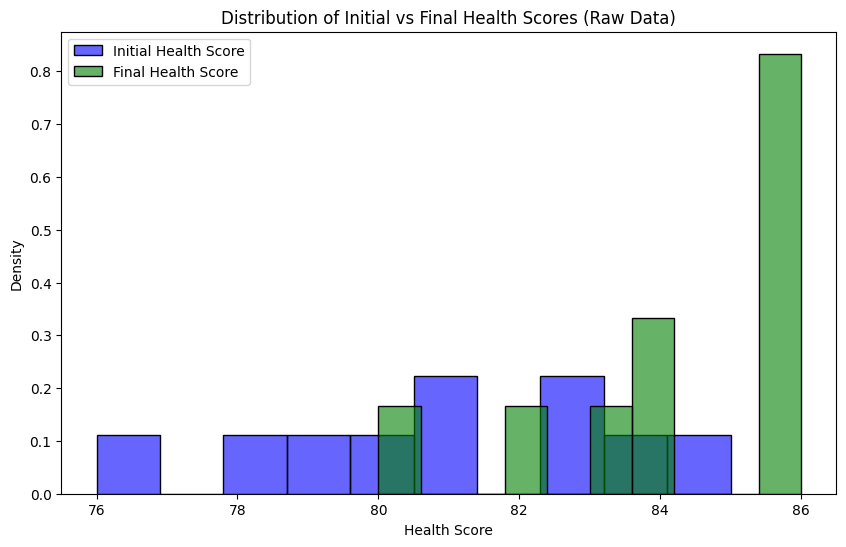

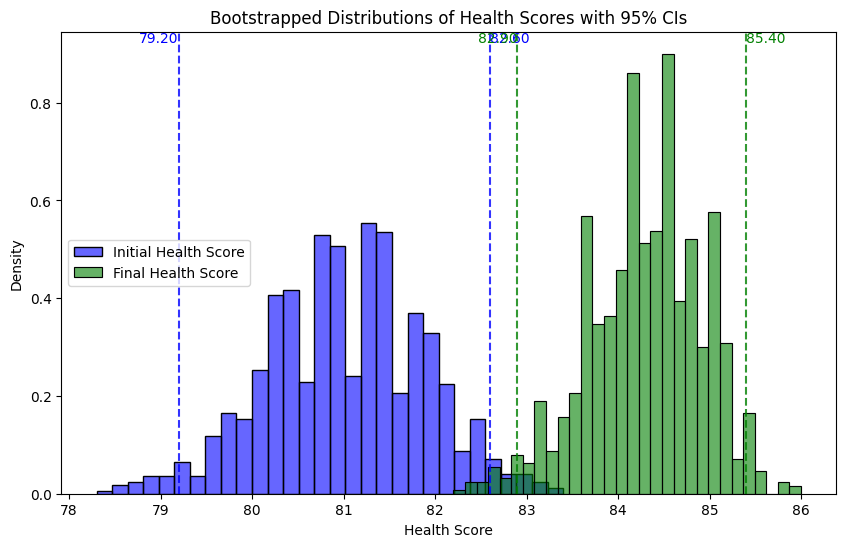

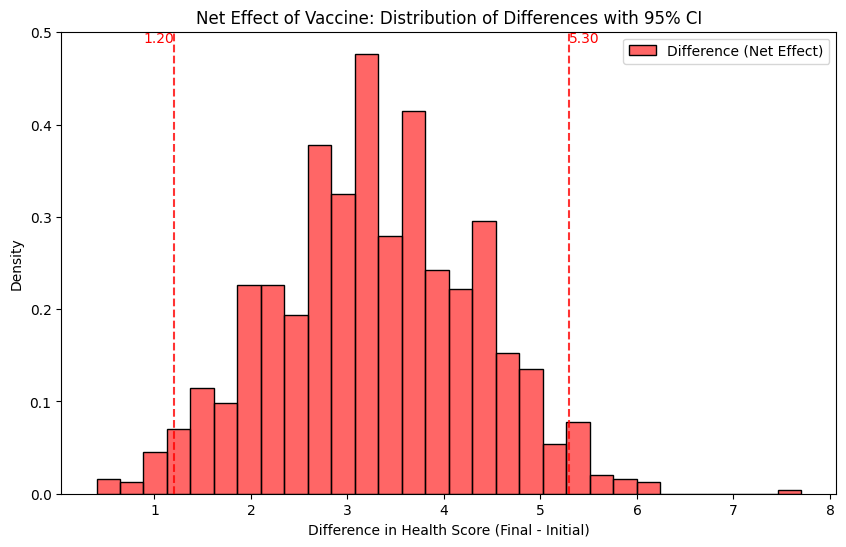

: 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('test_vacc.csv')

# Set random seed for reproducibility
np.random.seed(42)

# Graph 1: Raw data histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['InitialHealthScore'], color='blue', label='Initial Health Score', kde=False, stat='density', bins=10, alpha=0.6)
sns.histplot(df['FinalHealthScore'], color='green', label='Final Health Score', kde=False, stat='density', bins=10, alpha=0.6)
plt.title('Distribution of Initial vs Final Health Scores (Raw Data)')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend()
plt.show(renderer="png")

# Bootstrapping function
def bootstrap_mean(data, size):
    return np.mean(np.random.choice(data, size=size, replace=True))

n_bootstrap = 1000
initial_means = [bootstrap_mean(df['InitialHealthScore'], len(df)) for _ in range(n_bootstrap)]
final_means = [bootstrap_mean(df['FinalHealthScore'], len(df)) for _ in range(n_bootstrap)]
difference_means = [f - i for f, i in zip(final_means, initial_means)]

# Graph 2: Bootstrapped distributions
plt.figure(figsize=(10, 6))
sns.histplot(initial_means, color='blue', label='Initial Health Score', kde=False, stat='density', bins=30, alpha=0.6)
sns.histplot(final_means, color='green', label='Final Health Score', kde=False, stat='density', bins=30, alpha=0.6)

for data, color in zip([initial_means, final_means], ['blue', 'green']):
    ci_lower, ci_upper = np.percentile(data, [2.5, 97.5])
    plt.axvline(ci_lower, color=color, linestyle='--', alpha=0.8)
    plt.axvline(ci_upper, color=color, linestyle='--', alpha=0.8)
    plt.text(ci_upper, plt.gca().get_ylim()[1], f'{ci_upper:.2f}', color=color, ha='left', va='top')
    plt.text(ci_lower, plt.gca().get_ylim()[1], f'{ci_lower:.2f}', color=color, ha='right', va='top')

plt.title('Bootstrapped Distributions of Health Scores with 95% CIs')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend()
plt.show(renderer="png")

# Graph 3: Net effect (difference distribution)
plt.figure(figsize=(10, 6))
sns.histplot(difference_means, color='red', label='Difference (Net Effect)', kde=False, stat='density', bins=30, alpha=0.6)

ci_lower, ci_upper = np.percentile(difference_means, [2.5, 97.5])
plt.axvline(ci_lower, color='red', linestyle='--', alpha=0.8)
plt.axvline(ci_upper, color='red', linestyle='--', alpha=0.8)
plt.text(ci_upper, plt.gca().get_ylim()[1], f'{ci_upper:.2f}', color='red', ha='left', va='top')
plt.text(ci_lower, plt.gca().get_ylim()[1], f'{ci_lower:.2f}', color='red', ha='right', va='top')

plt.title('Net Effect of Vaccine: Distribution of Differences with 95% CI')
plt.xlabel('Difference in Health Score (Final - Initial)')
plt.ylabel('Density')
plt.legend()
plt.show(renderer="png")

#### Conclusion

We see that 0.0 is not included within the confidence interval, meaning that the null, H₀, hypothesis can be rejected with a good amount of confidence.

### Question 9

Mostly, will finish later.


---

### Summary of the conversation

1. **Introduction to Key Concepts**  
   The conversation begins with a discussion on the difference between the "standard error of the mean" and the "standard deviation." Key points include the explanation of bootstrapped means, how standard error is calculated as the standard deviation of these means, and the variability in sample means. It also contrasts standard deviation, which measures the spread of individual data points, with standard error, which deals with variability in sample means. The importance of sample size and confidence intervals in both concepts is also highlighted.

2. **Creating Bootstrapped Confidence Intervals**  
   The conversation introduces bootstrapping to estimate a 95% confidence interval. A step-by-step explanation of the process is provided, where the user sorts bootstrapped means, identifies the 2.5th and 97.5th percentiles, and uses them to create the interval. The method is robust as it avoids assuming a normal distribution, relying directly on data.

3. **Code Refinement**  
   The user shares Python code for calculating a bootstrapped confidence interval using customer data. A more sophisticated version of the code is provided, which includes analysis, decision-making based on the confidence interval, and the mean difference between bootstrapped and original means. The improved code calculates further insights and outputs actionable results, such as identifying when the original mean significantly deviates from the confidence interval.

4. **Customer Churn Analysis**  
   The conversation includes an example of customer churn analysis. Python code is provided to analyze churn rates based on various factors, such as geography, gender, and the number of products used by customers. The analysis produces actionable insights for a company, such as promoting additional products to reduce churn or targeting specific customer groups based on credit score or geography.

5. **Hypothesis Testing Explanation**  
   The user discusses hypothesis testing, where a confidence interval overlapping zero "fails to reject the null hypothesis." The response refines the explanation, stating that if the interval includes zero, the true population effect could be zero, meaning there's insufficient evidence to reject the null hypothesis. Conversely, if zero is not in the interval, there is evidence to suggest a statistically significant effect, leading to rejection of the null hypothesis.

6. **Vaccine Effectiveness Analysis**  
   A detailed approach is provided to analyze a dataset that measures patients' health scores before and after taking a vaccine. The methodology includes bootstrapping to assess whether the mean difference in health scores is statistically significant. The process involves visualizations, quantitative analysis, and concluding based on the bootstrapped confidence interval. Recommendations are also made to improve the analysis, such as using more data and conducting a stratified analysis based on age or gender.

